# T5 Metabolite WGS

[1] "Number of Samples in our Biom Table"


[1] 32

[1] "Number of Sequence variants we have."


[1] 6141

[1] "Sequencing depth."


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
11844293 14749705 17624066 17849964 19838796 26972342 

T5_577   T5_576   T5_588   T5_583   T5_585   T5_570   T5_575   T5_582 
11844293 11977546 11989375 12934027 14029933 14175221 14351374 14505834 
  T5_589   T5_580   T5_586   T5_573   T5_571   T5_603   T5_574   T5_594 
14830995 14940465 15313830 16145009 16621157 17321737 17442236 17558265 
  T5_602   T5_598   T5_591   T5_600   T5_572   T5_581   T5_599   T5_592 
17689868 18014210 18072780 18283513 18338221 18762040 18893728 19813872 
  T5_584 
19913567

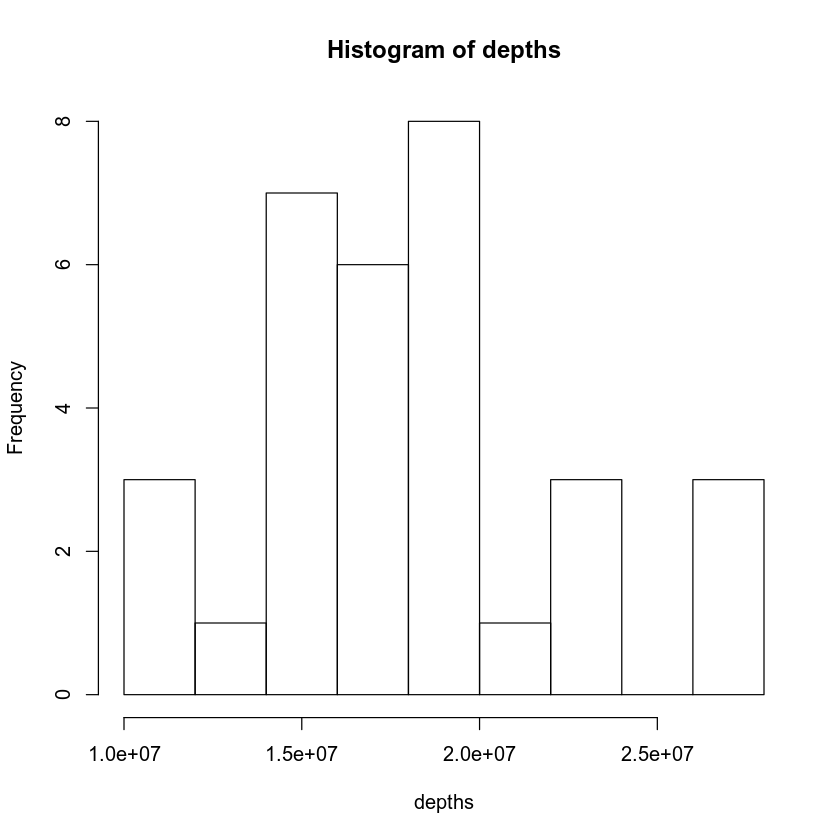

In [2]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("T5_Metabolites_WGS.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Deseq2_T5_mapping.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)
meta_table<-data.frame(meta_table)
#Now load the taxonomy (this is fake)
OTU_taxonomy<-read.csv("taxonomy_metabolites_WGS.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq)),25)

In [3]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq, sample.size = 11800000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth

In [12]:
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Treatment)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Treatment)
permutest(CategorybetaDNA)

pdf('Metabolite_WGS_T5_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()

#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Treatment, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray', weighted=FALSE)
a$aov.tab


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.019657 0.0065523 2.8715    999  0.037 *
Residuals 28 0.063890 0.0022818                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.019657 0.0065523 2.8715    999  0.046 *
Residuals 28 0.063890 0.0022818                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

png 
  2

[1] "Treatment" "Timepoint"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Treatment,3,0.3736181,0.12453937,1.566996,0.1437568,0.000999001
Residuals,28,2.2253415,0.07947648,NA,0.8562432,NA
Total,31,2.5989596,NA,NA,1.0000000,NA


In [13]:
CategorybetaDNA


	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Treatment)

No. of Positive Eigenvalues: 31
No. of Negative Eigenvalues: 0

Average distance to median:
    CoL     CoP     Let Placebo 
 0.2818  0.2607  0.2761  0.2185 

Eigenvalues for PCoA axes:
(Showing 8 of 31 eigenvalues)
  PCoA1   PCoA2   PCoA3   PCoA4   PCoA5   PCoA6   PCoA7   PCoA8 
0.42837 0.28617 0.24629 0.20136 0.18910 0.15981 0.14058 0.09592 

In [14]:
meta.rarefy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5500 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 5500 taxa by 7 taxonomic ranks ]

In [15]:
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)

Run 0 stress 0.205114 
Run 1 stress 0.2092488 
Run 2 stress 0.2164461 
Run 3 stress 0.2219815 
Run 4 stress 0.2105153 
Run 5 stress 0.2081024 
Run 6 stress 0.2053075 
... Procrustes: rmse 0.04303401  max resid 0.2015321 
Run 7 stress 0.2105191 
Run 8 stress 0.2164413 
Run 9 stress 0.2186076 
Run 10 stress 0.228333 
Run 11 stress 0.2051227 
... Procrustes: rmse 0.001698542  max resid 0.007862089 
... Similar to previous best
Run 12 stress 0.2109308 
Run 13 stress 0.2299182 
Run 14 stress 0.2051052 
... New best solution
... Procrustes: rmse 0.01722605  max resid 0.06601086 
Run 15 stress 0.2109306 
Run 16 stress 0.2324481 
Run 17 stress 0.2128903 
Run 18 stress 0.212516 
Run 19 stress 0.2052352 
... Procrustes: rmse 0.04415927  max resid 0.1995625 
Run 20 stress 0.2332536 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


In [18]:
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Treatment 
)
pdf('Metabolite_WGS_T5_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Treatment",shape = "Treatment",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite+WGS T5") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()

png 
  2

# Metabolite WGS T2

[1] "Number of Samples in our Biom Table"


[1] 32

[1] "Number of Sequence variants we have."


[1] 6141

[1] "Sequencing depth."


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
10577691 14241880 20995083 20723425 27132535 34978805 

576_T2   582_T2   581_T2   580_T2   572_T2   583_T2   585_T2   584_T2 
10577691 11815156 11937797 12701598 13487439 13563804 13669145 14083500 
  574_T2   578_T2   586_T2   575_T2   570_T2   577_T2   597_T2   596_T2 
14294673 14832570 15467514 16097872 16098073 18347897 20142542 20253112 
  603_T2   593_T2   573_T2   589_T2   594_T2   571_T2   599_T2   598_T2 
21737054 21800865 22426703 23611264 24035586 24731392 25030239 26936333 
  590_T2 
27721141

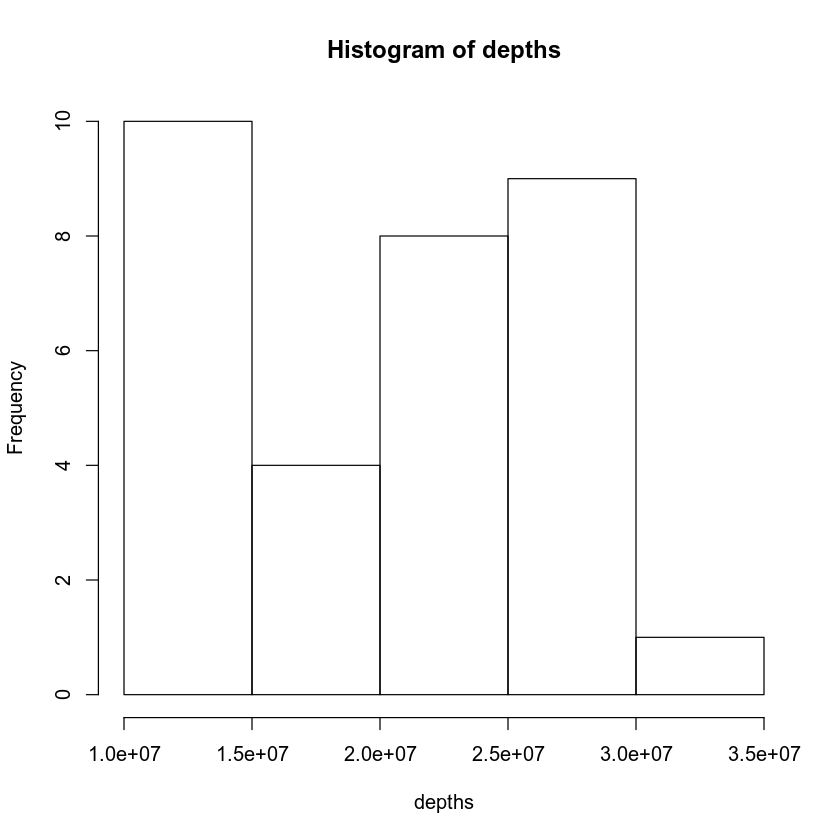

In [21]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("T2_Metabolites_WGS.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Deseq2_T2_mapping.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)
meta_table<-data.frame(meta_table)
#Now load the taxonomy (this is fake)
OTU_taxonomy<-read.csv("taxonomy_metabolites_WGS.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)
#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq)),25)

In [22]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq, sample.size = 10500000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Treatment)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Treatment)
permutest(CategorybetaDNA)

pdf('Metabolite_WGS_T2_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()

#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Treatment, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray', weighted=FALSE)
a$aov.tab
CategorybetaDNA
meta.rarefy
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Treatment 
)
pdf('Metabolite_WGS_T2_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Treatment",shape = "Treatment",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite+WGS T2") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.005920 0.0019735 0.6924    999  0.552
Residuals 28 0.079807 0.0028502                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.005920 0.0019735 0.6924    999  0.591
Residuals 28 0.079807 0.0028502                     

png 
  2

[1] "Treatment" "Timepoint"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Treatment,3,1.504286,0.50142852,6.373608,0.4057829,0.000999001
Residuals,28,2.202834,0.07867264,NA,0.5942171,NA
Total,31,3.707119,NA,NA,1.0000000,NA



	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Treatment)

No. of Positive Eigenvalues: 30
No. of Negative Eigenvalues: 1

Average distance to median:
    CoL     CoP     Let Placebo 
 0.2452  0.2504  0.2559  0.2807 

Eigenvalues for PCoA axes:
(Showing 8 of 31 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
1.3948 0.3915 0.2301 0.1927 0.1916 0.1398 0.1319 0.1151 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5627 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 5627 taxa by 7 taxonomic ranks ]

Run 0 stress 0.1057305 
Run 1 stress 0.126588 
Run 2 stress 0.1057305 
... New best solution
... Procrustes: rmse 2.170239e-05  max resid 9.308846e-05 
... Similar to previous best
Run 3 stress 0.1057304 
... New best solution
... Procrustes: rmse 9.988729e-05  max resid 0.0005105261 
... Similar to previous best
Run 4 stress 0.1445351 
Run 5 stress 0.1324937 
Run 6 stress 0.1600272 
Run 7 stress 0.1571363 
Run 8 stress 0.1057304 
... Procrustes: rmse 3.206625e-05  max resid 0.0001507501 
... Similar to previous best
Run 9 stress 0.1323267 
Run 10 stress 0.1057304 
... Procrustes: rmse 2.613916e-05  max resid 0.0001067044 
... Similar to previous best
Run 11 stress 0.1398017 
Run 12 stress 0.1057304 
... Procrustes: rmse 1.950703e-05  max resid 7.571404e-05 
... Similar to previous best
Run 13 stress 0.1380385 
Run 14 stress 0.1265864 
Run 15 stress 0.1265871 
Run 16 stress 0.1323275 
Run 17 stress 0.1381865 
Run 18 stress 0.1057307 
... Procrustes: rmse 0.0001473468  max resid 0.00072

png 
  2

# Metabolite + 16s T5

In [26]:
library(phyloseq)
library(ggplot2)
library(dplyr)
#Make sure the data has the sample names on rows if not just transform the data with t()
abund_table<-read.csv("Metabolites_16S.csv",row.names=1,check.names=FALSE)
meta_table<-read.csv("Mapping_file_w_og.csv",row.names=1,check.names=FALSE)
#Transpose the data to have sample names on rows
abund_table<-t(abund_table)
meta_table<-data.frame(meta_table)
#Now load the taxonomy (this is fake)
OTU_taxonomy<-read.csv("taxonomy_metabolites_16S.csv",row.names=1,check.names=FALSE)
#Convert to phyloseq
library(phyloseq)
#Convert the data to phyloseq format
OTU = otu_table(as.matrix(abund_table), taxa_are_rows = FALSE)
TAX = tax_table(as.matrix(OTU_taxonomy))
SAM = sample_data(meta_table)
physeq<-merge_phyloseq(phyloseq(OTU, TAX),SAM)
# Start to explore the data a bit 
#number of samples
print ('Number of Samples in our Biom Table')
nsamples(physeq)
# number of sequence variants
print ('Number of Sequence variants we have.')
ntaxa(physeq)

[1] "Number of Samples in our Biom Table"


[1] 156

[1] "Number of Sequence variants we have."


[1] 2658

[1] Placebo   Letrozole Co-P      Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 1 2 3 4 5
Levels: 1 2 3 4 5

[1] Placebo   Letrozole Co-P      Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 5
Levels: 5

[1] "Sequencing depth."


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 4536639  7895075  9478852 10074467 12038012 19230890 

576.T5_BF11_01_33368  583.T5_BG5_01_33375  588.T5_BG9_01_33379 
             4536639              4740327              5002817 
577.T5_BF12_01_33369  582.T5_BG4_01_33374 575.T5_BF10_01_33367 
             5182671              6373842              6721940 
 573.T5_BF8_01_33365  570.T5_BF5_01_33362 589.T5_BG10_01_33380 
             7848295              7910668              7916061 
 580.T5_BG2_01_33372  585.T5_BG7_01_33377  586.T5_BG8_01_33378 
             8398074              8740154              8744401 
 572.T5_BF7_01_33364  571.T5_BF6_01_33363  598.T5_BH7_01_33390 
             9004230              9392402              9565302 
 574.T5_BF9_01_33366  581.T5_BG3_01_33373  594.T5_BH3_01_33386 
             9897550             10671315             10735102 
 599.T5_BH8_01_33391 591.T5_BG12_01_33382  595.T5_BH4_01_33387 
            11457990             11465065             11973325 
590.T5_BG11_01_33381  584.T5_BG6_01_33376  592.T5_BH1_01_33384 
            12232074             12911299             12984230 
 597.T5_BH6_01_33389 
            14043479

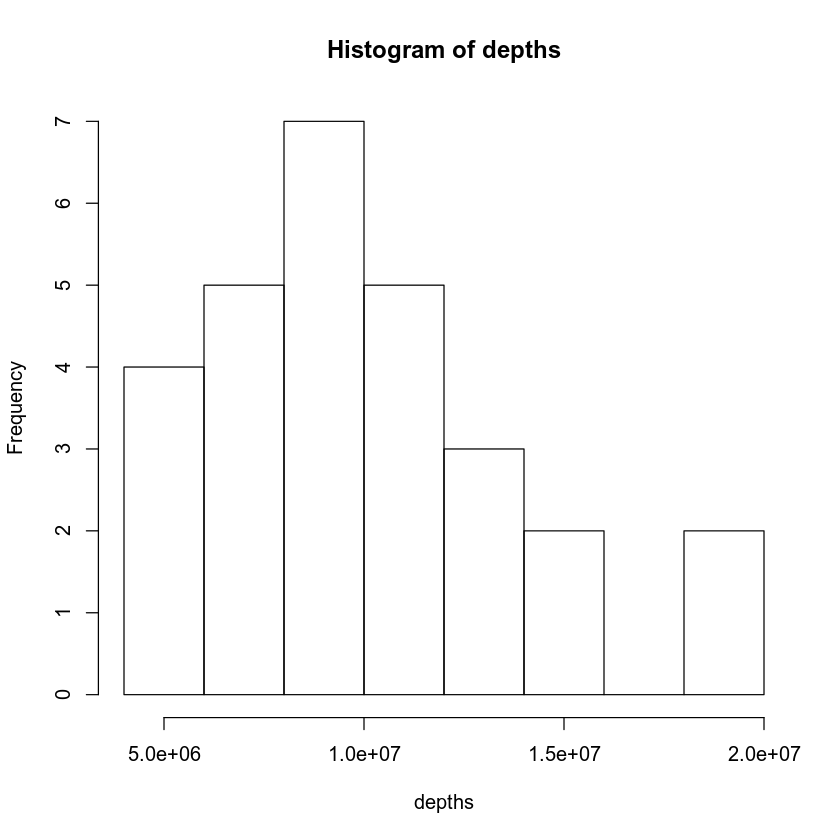

In [27]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '2')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt)),25)

In [29]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 4530000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_16S_T5_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()

#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray', weighted=FALSE)
a$aov.tab
CategorybetaDNA
meta.rarefy
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_16S_T5_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite+16S T5") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.010397 0.0034656 1.0271    999  0.383
Residuals 24 0.080979 0.0033741                     


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)
Groups     3 0.010397 0.0034656 1.0271    999  0.372
Residuals 24 0.080979 0.0033741                     

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,0.572573,0.1908577,1.301485,0.1399222,0.03296703
Residuals,24,3.519507,0.1466461,NA,0.8600778,NA
Total,27,4.092080,NA,NA,1.0000000,NA



	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Category)

No. of Positive Eigenvalues: 27
No. of Negative Eigenvalues: 0

Average distance to median:
     Co-L      Co-P Letrozole   Placebo 
   0.3763    0.3390    0.3636    0.3275 

Eigenvalues for PCoA axes:
(Showing 8 of 27 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
0.6390 0.4297 0.4160 0.3334 0.3014 0.2649 0.2000 0.1804 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1875 taxa and 28 samples ]
sample_data() Sample Data:       [ 28 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 1875 taxa by 7 taxonomic ranks ]

Run 0 stress 0.2255957 
Run 1 stress 0.216383 
... New best solution
... Procrustes: rmse 0.144671  max resid 0.3567129 
Run 2 stress 0.2467045 
Run 3 stress 0.2314916 
Run 4 stress 0.2359156 
Run 5 stress 0.214871 
... New best solution
... Procrustes: rmse 0.06379649  max resid 0.159633 
Run 6 stress 0.219909 
Run 7 stress 0.2295921 
Run 8 stress 0.2297957 
Run 9 stress 0.2315044 
Run 10 stress 0.2395378 
Run 11 stress 0.2180449 
Run 12 stress 0.2361565 
Run 13 stress 0.2188641 
Run 14 stress 0.242439 
Run 15 stress 0.242804 
Run 16 stress 0.2178833 
Run 17 stress 0.2148415 
... New best solution
... Procrustes: rmse 0.007178987  max resid 0.02391267 
Run 18 stress 0.2233831 
Run 19 stress 0.239569 
Run 20 stress 0.2183861 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


png 
  2

# Metabolite 16S T2

[1] Placebo   Letrozole Co-P      Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 1 2 3 4 5
Levels: 1 2 3 4 5

[1] Placebo   Letrozole Co-P      Co-L     
Levels: Co-L Co-P Letrozole Placebo

[1] 2
Levels: 2

[1] "Sequencing depth."


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 6038131  8069925 14044905 14139396 19942043 26151693 

582.T2_RG4_01_33142  581.T2_RG3_01_33141  584.T2_RG6_01_33144 
             6038131              6561713              6771430 
576.T2_RF11_01_33136  583.T2_RG5_01_33143  580.T2_RG2_01_33140 
             6827856              7022115              7188500 
 586.T2_RG8_01_33146  585.T2_RG7_01_33145  574.T2_RF9_01_33134 
             7324135              7631045              8216218 
 578.T2_RG1_01_33139  572.T2_RF7_01_33132 575.T2_RF10_01_33135 
             8390967              8588804              9369408 
 570.T2_RF5_01_33130 577.T2_RF12_01_33137  597.T2_RH6_01_33157 
             9813431             12071085             13445696 
603.T2_RH12_01_33163  596.T2_RH5_01_33156  573.T2_RF8_01_33133 
            14014220             14075590             14350908 
 593.T2_RH2_01_33153  594.T2_RH3_01_33154 589.T2_RG10_01_33148 
            15307208             17017216             17945846 
 571.T2_RF6_01_33131  599.T2_RH8_01_33159  598.T2_RH7_01_33158 
            18371671             19081034             19835265 
602.T2_RH11_01_33162 
            20262378

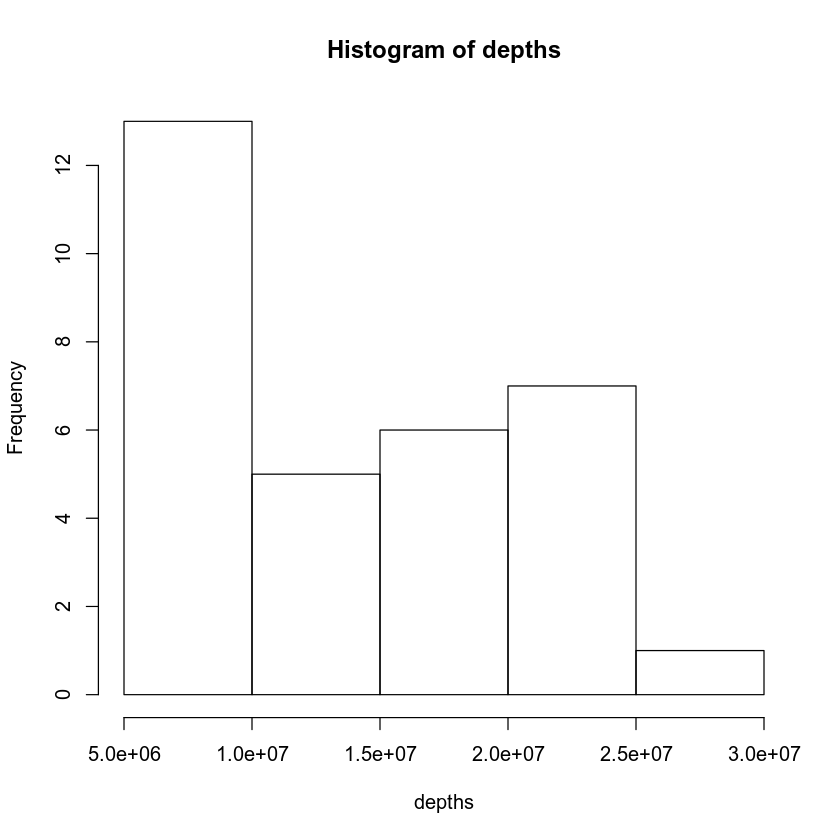

In [30]:
unique(sample_data(physeq)$Category)
unique(sample_data(physeq)$Week)

#Remove cecum and time 0
physeq.pt = subset_samples(physeq, Week != 'cecum.T5' & Week != '0' & Week != '1'& Week != '3'& Week != '4'& Week != '5')
unique(sample_data(physeq.pt)$Category)
unique(sample_data(physeq.pt)$Week)

#summary statistics of sampling depth
print ('Sequencing depth.')
depths <- sample_sums(physeq.pt)
summary(depths)
hist(depths)
head(sort(sample_sums(physeq.pt)),25)

In [31]:
# It is always important to set a seed when you subsample so your result is replicable . Here we will be 
# subsampling libraries with replacement 
set.seed(123)
        
 
    
meta.rarefy <- rarefy_even_depth(physeq.pt, sample.size = 6030000, verbose = FALSE, replace = TRUE)#need to change sample size based off min sequencing depth
library('vegan')
###############################################
#####  PERMANOVA  ############-----------------
###############################################

#make a data frame from the sample_data (unweighted unifrac)
df = as(sample_data(meta.rarefy), "data.frame")
d = phyloseq::distance(meta.rarefy, "bray")

#test for homogeneity of data
sampledf <- data.frame(sample_data(meta.rarefy))
beta <- betadisper(d, sampledf$Category)
permutest(beta)

CategorybetaDNA <- betadisper(d, sampledf$Category)
permutest(CategorybetaDNA)

pdf('Metabolite_16S_T2_ellipse.pdf', width=20, height=15)
plot(CategorybetaDNA, ellipse = TRUE, hull=F)  
dev.off()

#now run permanova
set.seed(2)
GPNMDS = ordinate(meta.rarefy, "PCoA", d)
sample_variables(meta.rarefy)
a=adonis(d ~ Category, as(sample_data(meta.rarefy), "data.frame"), permutations=1000, method='bray', weighted=FALSE)
a$aov.tab
CategorybetaDNA
meta.rarefy
set.seed(123)
DistBC = distance(meta.rarefy, method = "bray")
#ordination
ordBC = ordinate(meta.rarefy, method = "NMDS", distance = DistBC)
cap_ord <- ordinate(
    physeq = meta.rarefy, 
    method = "CAP",
    distance = "bray",
    formula = ~ Category 
)
pdf('Metabolite_16S_T2_CAP.pdf', width=15, height=15)
cap_plot <- plot_ordination(physeq = meta.rarefy,ordination = cap_ord, 
    color = "Category",shape = "Category",axes = c(1,2)) + geom_point(size = 10)+
    scale_color_manual(values = c("blue", "purple", "darkgreen", "red", 
    "#1919ff", "darkorchid3", "black")) + ggtitle("CAP: Metabolite+16S T2") + theme_bw() +
    theme(text = element_text(size = 50),
    panel.grid.major=element_blank(),
    panel.grid.minor=element_blank(), 
    panel.background=element_rect(colour="black",fill=NA,size=2)) + 
    scale_shape_manual(values=c(15,18,17,19)) + geom_hline(yintercept=0,colour="black",linetype="dashed") + 
    geom_vline(xintercept=0,colour="black",linetype="dashed") 
cap_plot
dev.off()


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.037449 0.0124830 3.0916    999  0.041 *
Residuals 28 0.113058 0.0040378                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df   Sum Sq   Mean Sq      F N.Perm Pr(>F)  
Groups     3 0.037449 0.0124830 3.0916    999  0.058 .
Residuals 28 0.113058 0.0040378                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

png 
  2

[1] "BarcodeSequence"            "LinkerPrimerSequence"      
 [3] "filename"                   "ID_OG_MAP"                 
 [5] "Barcode"                    "adaptor"                   
 [7] "TSRI_Seq_plate"             "Well_Position"             
 [9] "Sequenc_.Name"              "Sequence"                  
[11] "PCR_Date"                   "Mouse"                     
[13] "Cage"                       "Week"                      
[15] "mouse.time"                 "Cecum"                     
[17] "Category_type_time"         "weight"                    
[19] "Category"                   "type"                      
[21] "Lh"                         "Insulin"                   
[23] "Testosterone"               "Weight_g"                  
[25] "observed_SVs1250"           "pielou_e1250"              
[27] "faith_pd1250"               "shannon1250"               
[29] "FBG"                        "Description"               
[31] "ATTRIBUTE_GNPSDefaultGroup"

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
Category,3,2.227527,0.7425089,6.093677,0.3950005,0.000999001
Residuals,28,3.411774,0.1218491,NA,0.6049995,NA
Total,31,5.639301,NA,NA,1.0000000,NA



	Homogeneity of multivariate dispersions

Call: betadisper(d = d, group = sampledf$Category)

No. of Positive Eigenvalues: 31
No. of Negative Eigenvalues: 0

Average distance to median:
     Co-L      Co-P Letrozole   Placebo 
   0.2784    0.2948    0.3515    0.3564 

Eigenvalues for PCoA axes:
(Showing 8 of 31 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
2.1264 0.4435 0.3687 0.3088 0.2564 0.2392 0.2040 0.1781 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2095 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 31 sample variables ]
tax_table()   Taxonomy Table:    [ 2095 taxa by 7 taxonomic ranks ]

Run 0 stress 0.101994 
Run 1 stress 0.3933229 
Run 2 stress 0.1237111 
Run 3 stress 0.1202738 
Run 4 stress 0.1100276 
Run 5 stress 0.1134911 
Run 6 stress 0.1289839 
Run 7 stress 0.1284642 
Run 8 stress 0.1338506 
Run 9 stress 0.1134911 
Run 10 stress 0.1044259 
Run 11 stress 0.101994 
... New best solution
... Procrustes: rmse 2.509921e-05  max resid 0.0001144834 
... Similar to previous best
Run 12 stress 0.1075622 
Run 13 stress 0.1151404 
Run 14 stress 0.1185848 
Run 15 stress 0.1190205 
Run 16 stress 0.1277067 
Run 17 stress 0.1044258 
Run 18 stress 0.1075617 
Run 19 stress 0.1069918 
Run 20 stress 0.1307908 
*** Solution reached


png 
  2